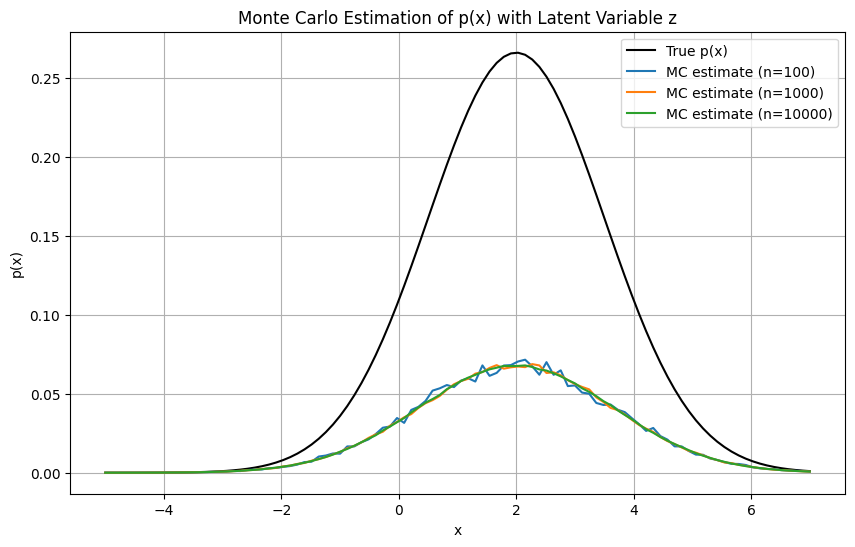

In [26]:
# let's say we want to perform a monte-carlo estimation of 
# p(x) = integral p(x|z) p(z)
# where:
#   p(z) is N(0, 1)
#   p(x|z) is N(z - 1, 1.5)
#   p(x) is N(2, 1.5)
import numpy as np
import matplotlib.pyplot as plt

def true_p_x(x, mu=2.0, sigma=1.5):
    return np.exp(-0.5 * ((x - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

def p_x_given_z(x, z, mu=1.0, sigma=1.5):
    # z is now used as a shift to the mean
    return np.exp(-0.5 * ((x - (mu + z)) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

def p_z(z):
    return np.exp(-0.5 * z**2) / np.sqrt(2 * np.pi)

def monte_carlo_estimation(x, num_samples, mu=2.0, sigma=1.5):
    z_samples = np.random.normal(0, 1, num_samples)
    p_x = np.mean([p_x_given_z(x, z, mu, sigma) * p_z(z) for z in z_samples])
    return p_x

# Set up the experiment
x_values = np.linspace(-5, 7, 100)
true_p_x_values = true_p_x(x_values)

# Perform Monte Carlo estimation with different sample sizes
sample_sizes = [100, 1000, 10000]
estimates = []

for size in sample_sizes:
    estimate = [monte_carlo_estimation(x, size) for x in x_values]
    estimates.append(estimate)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, true_p_x_values, 'k-', label='True p(x)')

for i, estimate in enumerate(estimates):
    plt.plot(x_values, estimate, label=f'MC estimate (n={sample_sizes[i]})')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Monte Carlo Estimation of p(x) with Latent Variable z')
plt.legend()
plt.grid(True)
plt.show()